## AirBnB Data evaluation

Let's take a look at the data first

In [79]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
url = '/Users/jennawhite/documents/wild_west/abnb_project/data/train_users_2.csv'

bnb = pd.read_csv(url, index_col='id')
bnb.shape


(213451, 15)

In [3]:
bnb.columns

Index([u'date_account_created', u'timestamp_first_active',
       u'date_first_booking', u'gender', u'age', u'signup_method',
       u'signup_flow', u'language', u'affiliate_channel',
       u'affiliate_provider', u'first_affiliate_tracked', u'signup_app',
       u'first_device_type', u'first_browser', u'country_destination'],
      dtype='object')

In [4]:
bnb.first_affiliate_tracked.value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64

In [5]:
bnb = pd.concat([bnb,pd.get_dummies(bnb['first_affiliate_tracked'],prefix='channel_')],axis=1)
bnb.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,first_device_type,first_browser,country_destination,channel__linked,channel__local ops,channel__marketing,channel__omg,channel__product,channel__tracked-other,channel__untracked
id,,,,,,,,,,,,,,,,,,,,,
gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,...,Mac Desktop,Chrome,NDF,0.0,0.0,0.0,0.0,0.0,0.0,1.0
820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,...,Mac Desktop,Chrome,NDF,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,...,Windows Desktop,IE,US,0.0,0.0,0.0,0.0,0.0,0.0,1.0
bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,...,Mac Desktop,Firefox,other,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,...,Mac Desktop,Chrome,US,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [6]:
bnb.shape

(213451, 22)

In [7]:
pd.concat([bnb, a],axis=1)

NameError: name 'a' is not defined

In [8]:
pd.concat

<function pandas.tools.merge.concat>

In [9]:
bnb.shape

(213451, 22)

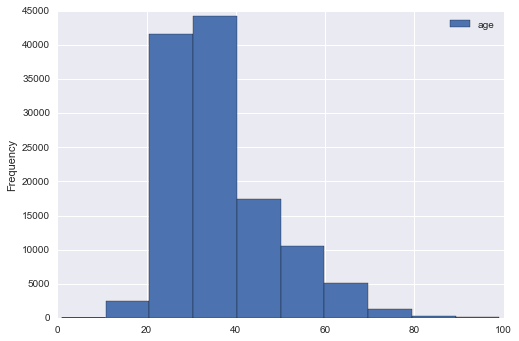

In [10]:
bnb[bnb['age']<100].plot(kind='hist', y='age')


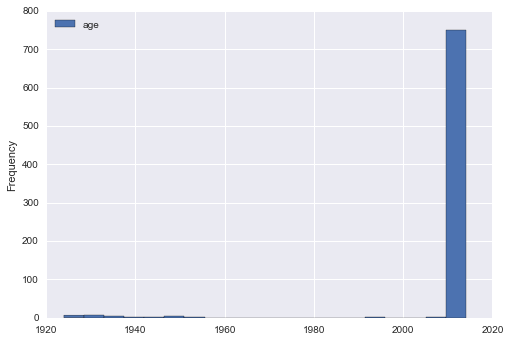

In [19]:
bnb[bnb['age']>1000].plot(kind='hist', y='age', bins=20)

In [20]:
bnb[bnb['age']>1000].age.head(10)

id
v2x0ms9c62    2014.0
umf1wdk9uc    2014.0
m82epwn7i8    2014.0
2th813zdx7    2013.0
3amf04n3o3    2014.0
6vpmryt377    2014.0
uxy91xb5p2    2014.0
bno0vva4uz    2014.0
h3rrmak4tu    2014.0
fou0j7fhnm    2014.0
Name: age, dtype: float64

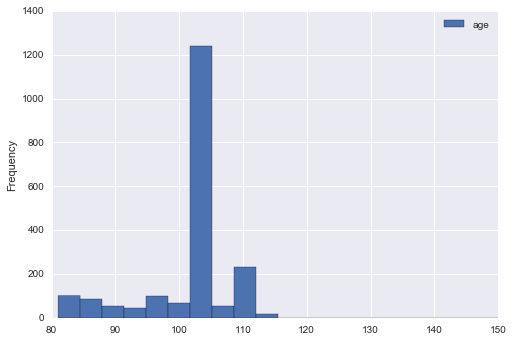

In [21]:
bnb2 = bnb[bnb['age']<1000]

bnb2[bnb2['age']>80].plot(kind='hist', y='age', bins=20)

In [22]:
print bnb2[bnb2['age']>80].shape
print bnb[bnb['age']>80].shape
print bnb['age'].shape
2771/213451

(1992, 22)
(2771, 22)
(213451,)


0

In [23]:
bnb[bnb['age']>80].head()
#there are 2771 people with ages over 80 -- looks like there are some 2014s too

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,first_device_type,first_browser,country_destination,channel__linked,channel__local ops,channel__marketing,channel__omg,channel__product,channel__tracked-other,channel__untracked
id,,,,,,,,,,,,,,,,,,,,,
v2x0ms9c62,2010-04-11,20100411065602,2010-04-13,-unknown-,2014.0,basic,3,en,other,craigslist,...,Windows Desktop,Firefox,FR,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9ouah6tc30,2010-04-12,20100412231534,2010-04-12,FEMALE,104.0,facebook,3,en,other,craigslist,...,iPhone,Mobile Safari,FR,1.0,0.0,0.0,0.0,0.0,0.0,0.0
dc3udjfdij,2010-05-19,20100519012455,2010-06-16,-unknown-,105.0,basic,2,en,other,craigslist,...,Mac Desktop,Safari,FR,0.0,0.0,0.0,1.0,0.0,0.0,0.0
ixv5186g1h,2010-05-21,20100521070029,NaN,MALE,95.0,basic,0,en,direct,direct,...,Mac Desktop,Firefox,NDF,0.0,0.0,0.0,0.0,0.0,0.0,1.0
umf1wdk9uc,2010-05-25,20100525155541,NaN,FEMALE,2014.0,basic,2,en,other,craigslist,...,Mac Desktop,Safari,NDF,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [24]:
bnb.age.isnull().sum()

0

In [25]:
bnb.shape

(213451, 22)

In [26]:
bnb.age.isnull().value_counts()

False    213451
Name: age, dtype: int64

In [27]:
bnbA= bnb[(bnb['age']<80) & (bnb['age']>=18)]

In [28]:
bnbA.shape

(210476, 22)

In [29]:
bnbx = bnb
bnbx.shape

(213451, 22)

In [30]:
b_dist =bnbx[(bnbx['age']<80) & (bnbx['age']>=18)]
bnbx['age'] = bnbx.age.fillna(28)


In [31]:
bnbx.shape

(213451, 22)

In [32]:
bnbB= bnbx[(bnbx['age']<80) & (bnbx['age']>=18)]

In [33]:
print 'A (no fillna() and values cut 18<=x<80):'
print bnbA.shape

print 'B (values cut 18<=x<80):'
print bnbB.shape

A (no fillna() and values cut 18<=x<80):
(210476, 22)
B (values cut 18<=x<80):
(210476, 22)


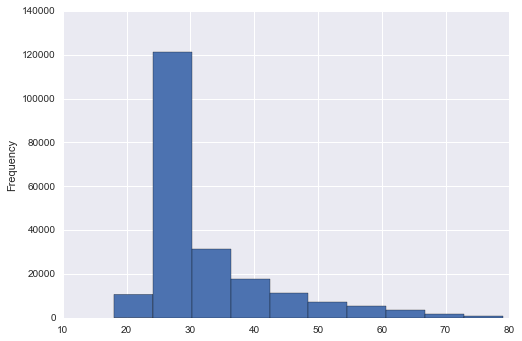

In [34]:
bnbA.age.plot.hist()

In [ ]:
bnbB.age.plot.hist()

In [ ]:
pd.Series(bnbA.age).isnull().any()

In [ ]:
pd.Series(bnbB.age).isnull().any()

## Something Else Below

In [35]:
bnbA.date_first_booking.head()

id
gxn3p5htnn           NaN
820tgsjxq7           NaN
4ft3gnwmtx    2010-08-02
bjjt8pjhuk    2012-09-08
87mebub9p4    2010-02-18
Name: date_first_booking, dtype: object

In [36]:
bnbA['date_first_booking'] = bnbA.date_first_booking.fillna(0)

/Users/jennawhite/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
bnbA.date_first_booking.head(10)

id
gxn3p5htnn             0
820tgsjxq7             0
4ft3gnwmtx    2010-08-02
bjjt8pjhuk    2012-09-08
87mebub9p4    2010-02-18
osr2jwljor    2010-01-02
lsw9q7uk0j    2010-01-05
0d01nltbrs    2010-01-13
a1vcnhxeij    2010-07-29
6uh8zyj2gn    2010-01-04
Name: date_first_booking, dtype: object

In [42]:
bnbAx = bnbA[bnbA['date_first_booking']!=0]
#if I want to create a sub dataset that is only for people who HAVE booked

In [43]:
bnbAx

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,first_device_type,first_browser,country_destination,channel__linked,channel__local ops,channel__marketing,channel__omg,channel__product,channel__tracked-other,channel__untracked
id,,,,,,,,,,,,,,,,,,,,,
4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,...,Windows Desktop,IE,US,0.0,0.0,0.0,0.0,0.0,0.0,1.0
bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,...,Mac Desktop,Firefox,other,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,...,Mac Desktop,Chrome,US,0.0,0.0,0.0,0.0,0.0,0.0,1.0
osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,28.0,basic,0,en,other,other,...,Mac Desktop,Chrome,US,0.0,0.0,0.0,1.0,0.0,0.0,0.0
lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,...,Mac Desktop,Safari,US,0.0,0.0,0.0,0.0,0.0,0.0,1.0
0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,...,Mac Desktop,Safari,US,0.0,0.0,0.0,1.0,0.0,0.0,0.0
a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,...,Mac Desktop,Safari,US,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,...,Mac Desktop,Firefox,US,0.0,0.0,0.0,1.0,0.0,0.0,0.0
yuuqmid2rp,2010-01-04,20100104194251,2010-01-06,FEMALE,36.0,basic,0,en,other,craigslist,...,Mac Desktop,Firefox,US,0.0,0.0,0.0,0.0,0.0,0.0,1.0


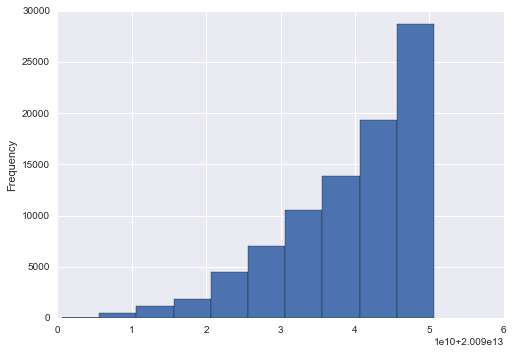

In [44]:
bnbAx.timestamp_first_active.plot.hist()

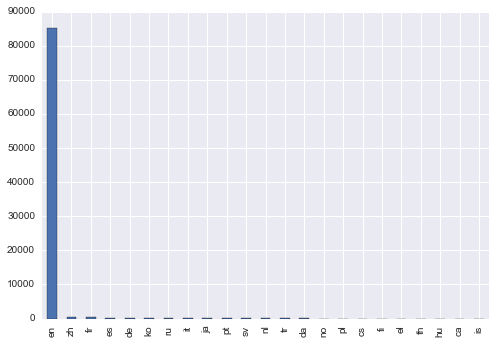

In [45]:
bnbAx.language.value_counts().plot.bar()

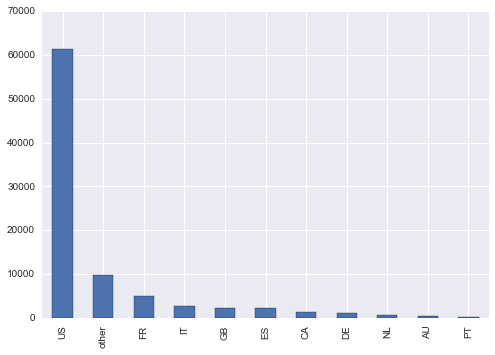

In [46]:
bnbAx.country_destination.value_counts().plot.bar()

In [ ]:
bnbAx[bnbAx['language']!='en'].country_destination.value_counts().plot.bar()

In [ ]:
bnbAx[bnbAx['language']=='en'].country_destination.value_counts().plot.pie()

In [ ]:
bnbAx[bnbAx['language']=='fr'].country_destination.value_counts().plot.pie()

In [ ]:
bnbAx[bnbAx['language']=='fr'].first_browser.value_counts().plot.pie()

In [59]:
a = bnbAx[bnbAx['language']=='en'].first_browser.value_counts()/len(bnbAx[bnbAx['language']=='en'])
a.head()

Chrome       0.335693
Safari       0.222363
Firefox      0.177160
-unknown-    0.086262
IE           0.085675
Name: first_browser, dtype: float64

In [60]:
b = bnbAx[bnbAx['language']=='fr'].first_browser.value_counts()/len(bnbAx[bnbAx['language']=='fr'])
b.head()

Chrome           0.357868
Safari           0.233503
Firefox          0.203046
Mobile Safari    0.098985
IE               0.053299
Name: first_browser, dtype: float64

In [61]:
c = bnbAx[bnbAx['language']=='es'].first_browser.value_counts()/len(bnbAx[bnbAx['language']=='es'])
c.head()

Chrome       0.375912
Firefox      0.208029
Safari       0.186131
-unknown-    0.094891
IE           0.069343
Name: first_browser, dtype: float64

In [62]:
bnbAx.first_browser.value_counts()

Chrome                  29424
Safari                  19363
Firefox                 15440
-unknown-                7550
IE                       7540
Mobile Safari            7063
Chrome Mobile             401
Android Browser           276
Opera                      63
AOL Explorer               60
Chromium                   42
Silk                       40
BlackBerry Browser         22
Maxthon                    16
Apple Mail                 15
RockMelt                   12
Mobile Firefox             12
Iron                        9
Sogou Explorer              9
Camino                      7
SiteKiosk                   7
IceWeasel                   7
IE Mobile                   7
TenFourFox                  4
Pale Moon                   4
SeaMonkey                   4
wOSBrowser                  3
CoolNovo                    3
TheWorld Browser            2
Opera Mini                  2
Kindle Browser              1
Avant Browser               1
CometBird                   1
Mozilla   

In [63]:
def browser(row:)
    if row['first_browser'] == 'Chrome':
        return 'Chrome'
    if row['first_browser'] == 'Safari':
        return 'Safari'
    if row['first_browser'] == 'Firefox':
        return 'Firefox' 
    if row['first_browser'] == '-unknown-':
        return 'unknown'
    if row['first_browser'] == 'IE':
        return 'IE'

SyntaxError: invalid syntax (<ipython-input-63-a53609673e38>, line 1)

### Mapping features to numbers  
**columns to do:**  
first_browser  
language  
country_destination  

In [47]:
d_bnbAx = pd.get_dummies(bnbAx['first_browser'], prefix = 'brow_')

In [48]:
d_bnbAx.head()

,brow__-unknown-,brow__AOL Explorer,brow__Android Browser,brow__Apple Mail,brow__Avant Browser,brow__BlackBerry Browser,brow__Camino,brow__Chrome,brow__Chrome Mobile,brow__Chromium,...,brow__SeaMonkey,brow__Silk,brow__SiteKiosk,brow__SlimBrowser,brow__Sogou Explorer,brow__Stainless,brow__TenFourFox,brow__TheWorld Browser,brow__Yandex.Browser,brow__wOSBrowser
id,,,,,,,,,,,,,,,,,,,,,
4ft3gnwmtx,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
bjjt8pjhuk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87mebub9p4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
osr2jwljor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lsw9q7uk0j,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
bnbAx.country_destination.value_counts()


US       61345
other     9904
FR        4953
IT        2776
GB        2280
ES        2216
CA        1405
DE        1043
NL         749
AU         531
PT         215
Name: country_destination, dtype: int64

bnbAx['country_code'] = bnbAx.country_destination.map({'other':0,'US':1,'FR':2,'IT':3,'GB':4,'ES':5,'CA':6,'DE':7,'NL':8,'AU':9,'PT':10})

In [50]:
bnbAx.head(5)

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,first_device_type,first_browser,country_destination,channel__linked,channel__local ops,channel__marketing,channel__omg,channel__product,channel__tracked-other,channel__untracked
id,,,,,,,,,,,,,,,,,,,,,
4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,...,Windows Desktop,IE,US,0.0,0.0,0.0,0.0,0.0,0.0,1.0
bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,...,Mac Desktop,Firefox,other,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,...,Mac Desktop,Chrome,US,0.0,0.0,0.0,0.0,0.0,0.0,1.0
osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,28.0,basic,0,en,other,other,...,Mac Desktop,Chrome,US,0.0,0.0,0.0,1.0,0.0,0.0,0.0
lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,...,Mac Desktop,Safari,US,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
bnbAx.language.value_counts()

en    85194
zh      518
fr      394
es      274
de      270
ko      236
ru      108
it      103
ja       83
pt       61
sv       44
nl       35
tr       20
da       19
no       13
pl       13
cs        8
fi        7
el        6
th        4
hu        3
ca        2
is        2
Name: language, dtype: int64

In [52]:
bnbAx['language_english'] = np.where(bnbAx['language']=='en', 1, 0)


/Users/jennawhite/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [56]:
bnbAx[bnbAx['language_english']==0].head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,first_browser,country_destination,channel__linked,channel__local ops,channel__marketing,channel__omg,channel__product,channel__tracked-other,channel__untracked,language_english
id,,,,,,,,,,,,,,,,,,,,,
1r5wy9nxcs,2010-03-06,20100306140655,2010-03-10,-unknown-,28.0,basic,0,fr,other,craigslist,...,Safari,US,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
wu91cbn838,2010-04-27,20100427232354,2010-05-07,FEMALE,28.0,basic,2,fr,direct,direct,...,Firefox,FR,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
5n1ezuhydr,2010-05-15,20100515181255,2010-05-17,-unknown-,33.0,basic,2,es,seo,google,...,-unknown-,US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
sloth6vmuc,2010-05-28,20100528135403,2010-06-01,-unknown-,28.0,basic,2,de,seo,google,...,-unknown-,US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
44nf02pdd3,2010-06-16,20100616001702,2010-06-16,-unknown-,28.0,basic,2,de,other,craigslist,...,Safari,DE,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [57]:
bnbAx['target'] = np.where(bnbAx['country_destination']=='US', 1, 0)

/Users/jennawhite/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [74]:
bnbAx.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,channel__linked,channel__local ops,channel__marketing,channel__omg,channel__product,channel__tracked-other,channel__untracked,language_english,target,gender_female
id,,,,,,,,,,,,,,,,,,,,,
4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1
bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1
87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0
osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,28.0,basic,0,en,other,other,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0
lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1


In [75]:
bnb.columns
type(bnb.gender)

pandas.core.series.Series

In [76]:
bnbAx.gender.value_counts()

FEMALE       31439
-unknown-    28491
MALE         27313
OTHER          174
Name: gender, dtype: int64

In [ ]:
bnb.isnull().sum()

In [ ]:
# gender
uk_row, uk_col = bnb[bnb['gender']=='-unknown-'].shape
m_row, m_col = bnb[bnb['gender']=='MALE'].shape
f_row, f_col = bnb[bnb['gender']=='FEMALE'].shape
o_row, o_col = bnb[bnb['gender']=='OTHER'].shape

row, col = bnb.shape

u = float(uk_row)/float(row)
m = float(m_row)/float(row)
f = float(f_row)/float(row)
o = float(o_row)/float(row)

perc = {'unknown':u, 
       'male':m,
       'female':f,
       'other':o}

print 'Accounts by Gender'
perc

In [ ]:
bnb2 = bnb[bnb['country_destination']!='NDF']

uk_row, uk_col = bnb2[bnb2['gender']=='-unknown-'].shape
m_row, m_col = bnb2[bnb2['gender']=='MALE'].shape
f_row, f_col = bnb2[bnb2['gender']=='FEMALE'].shape
o_row, o_col = bnb2[bnb2['gender']=='OTHER'].shape

row, col = bnb2.shape

u = float(uk_row)/float(row)
m = float(m_row)/float(row)
f = float(f_row)/float(row)
o = float(o_row)/float(row)

perc = {'unknown':u, 
       'male':m,
       'female':f,
       'other':o}
print 'Bookings by Gender'
perc


In [ ]:
row_bk, col3 = bnb2.shape
ATB = float(row_bk)/float(row)
ATB

In [67]:
bnbAx['gender_female'] = np.where(bnbAx['gender']=='FEMALE', 1, 0)

/Users/jennawhite/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [68]:
bnbAx.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,channel__linked,channel__local ops,channel__marketing,channel__omg,channel__product,channel__tracked-other,channel__untracked,language_english,target,gender_female
id,,,,,,,,,,,,,,,,,,,,,
4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1
bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,1
87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0
osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,28.0,basic,0,en,other,other,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,1,0
lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,1


In [ ]:
bnbAx[bnbAx['gender_female']==1]

In [77]:
bnbAx.first_device_type.value_counts()

Mac Desktop           41525
Windows Desktop       29605
iPhone                 6349
iPad                   5367
Other/Unknown          2851
Android Phone           708
Desktop (Other)         539
Android Tablet          448
SmartPhone (Other)       25
Name: first_device_type, dtype: int64

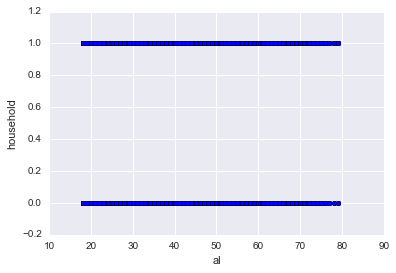

In [80]:
plt.scatter(bnbAx.age, bnbAx.target)
plt.xlabel('age')
plt.ylabel('target')

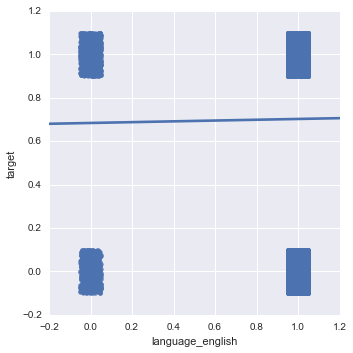

In [86]:
sns.lmplot(x='language_english', y='target', data=bnbAx, ci=None, logistic=True, x_jitter=0.05, y_jitter=0.1)

## BOOKING RATES

where:
affiliate_provider == 'facebook' --> bnb_fb
affiliate_provider == 'meetup'


In [ ]:
bnb_fb = bnb[bnb['affiliate_provider']=='facebook']
row_fb, col_fb = bnb_fb.shape

ATB_FB = float(row_fb)/float(row)

bnb_mu = bnb[bnb['affiliate_provider']=='meetup']
row_mu, col_mu = bnb_mu.shape

ATB_MU = float(row_mu)/float(row)

print ATB_FB
print ATB_MU

In [ ]:
bnb.groupby('gender').count()

In [ ]:
#timestamp first active

bnb['timestamp_first_active'][1]

In [ ]:
#language
bnb.groupby('language')


In [ ]:
bnb.groupby('affiliate_provider').count()

In [ ]:
print bnb.first_affiliate_tracked.shape
print pd.Series(bnb.first_affiliate_tracked).value_counts()

In [ ]:
pd.Series(bnb.first_affiliate_tracked).isnull().sum()

In [ ]:
pd.Series(bnb.first_affiliate_tracked).fillna('untracked', inplace=True)

In [ ]:
pd.Series(bnb.first_affiliate_tracked).isnull().any()

In [ ]:
pd.Series(bnb.first_affiliate_tracked).value_counts()

In [ ]:
# account created -- date value between 1/1/10 and 6/30/14



Let's think about this question: Based on observed characteristics, did a person book, and if yes, where?




